In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

## Using sklearn.datasets.load_diabetes apply Variance method for removing the constant column also after applying the Variance method apply multi linear regression on that data 

In [2]:
### Loading Diabetes dataset using SKlearn

from sklearn.datasets import load_diabetes

In [3]:
### Checking dependent and independent Variables 

diabetes = load_diabetes()
print(diabetes.data)
print(diabetes.target)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [4]:
### Converting Data into pandas DataFrame using pandas library 

X = pd.DataFrame(data = diabetes.data , columns=diabetes.feature_names)
Y = pd.Series(data = diabetes.target, name = "Diabetes")

In [5]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
print(X.shape)
print(Y.shape)

(442, 10)
(442,)


In [7]:
print(X.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: Diabetes
Non-Null Count  Dtype  
--------------  -----  
442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB
None


In [8]:
### Importing variance selection from Sklearn 

from sklearn.feature_selection import VarianceThreshold

In [9]:
### Applying Variance on X data taking threshold as 0(Default)

selector = VarianceThreshold(threshold=0)
selector.fit_transform(X)

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [10]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [11]:
columns = selector.get_support(indices = True)

In [12]:
X = X.iloc[:,columns]

In [13]:
X.shape

(442, 10)

### After applying Variance Method getting non of the column is constant so variance is 0 means no column will be removed 

In [14]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


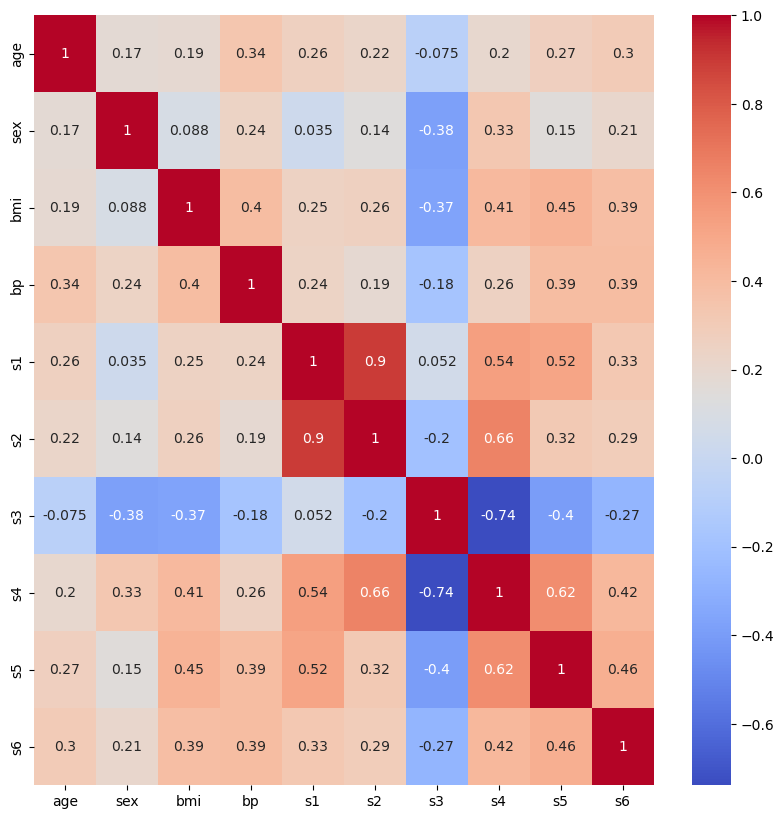

In [15]:
### Checking Heatmap correlation 

plt.figure(figsize =(10,10))
sns.heatmap(X.corr(),annot = True, cmap ="coolwarm")
plt.show()

In [16]:
### As per the heatmap s1 & s2 features are highly correlated with each others 

X.drop(["s2"], axis=1, inplace=True)

In [17]:
X.head(2)

,age,sex,bmi,bp,s1,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,0.074412,-0.039493,-0.068330,-0.092204


In [18]:
### Importing necessary Libraries using Sklearn 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
X = np.asarray(X)
Y = np.asarray(Y)

In [20]:
### Spliting data and checking their shapes 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print('Shape of the training input data:', X_train.shape)
print('Shape of the training output data:', Y_train.shape)
print('Shape of the test input data:', X_test.shape)
print('Shape of the test output data:', Y_test.shape)

Shape of the training input data: (353, 9)
Shape of the training output data: (353,)
Shape of the test input data: (89, 9)
Shape of the test output data: (89,)


In [21]:
### Model Fitting 

model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [22]:
## Creating y_pred for storing prediction value

y_pred = model.predict(X_test)

In [23]:
## Converting y_test and y_pred into list so can compare the Actual and predicted values

Y_test = list(Y_test) 
y_pred = list(y_pred)

In [24]:
## Comparing Actual and Predicted Value 

pd.DataFrame(data={"Actual":Y_test, "Prediction": y_pred})

,Actual,Prediction
0,73.0,151.809497
1,233.0,204.102064
2,97.0,123.275584
3,111.0,103.895348
4,277.0,269.636223
...,...,...
84,268.0,205.432114
85,55.0,146.802337
86,270.0,291.458479
87,288.0,206.008993


In [25]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(Y_test, y_pred)
print('Mean Squared Error is:', MSE)

# Root Mean Squared Error (RMSE)
import math
RMSE = math.sqrt(MSE)
print('Root Mean Squared Error is:', RMSE)

# R2 Score
from sklearn.metrics import r2_score
r2= r2_score(y_pred , Y_test)
print(f"Model Accuracy is :" ,r2)

Mean Squared Error is: 3081.8199408486926
Root Mean Squared Error is: 55.51414180953077
Model Accuracy is : 0.01897136709807845


## Using sklearn.datasets.load_wine Apply Correlation and make a heat map using seaborn and remove the highly correlated columns if exist and the apply SVM and get the best accuracy by changing the Hyperparameters 


In [26]:
### Loading Diabetes dataset using SKlearn

from sklearn.datasets import load_wine

In [27]:
### Checking dependent and independent Variables 

load_wine = load_wine()
print(load_wine.data)
print(load_wine.target)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [28]:
# Print the features of the dataset
print("Features:", load_wine.feature_names)

# Print the classes of the dataset
print("Classes:", load_wine.target_names)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: ['class_0' 'class_1' 'class_2']


In [29]:
### Converting Data into pandas DataFrame using pandas library 

X1 = pd.DataFrame(data = load_wine.data , columns=load_wine.feature_names)
Y1 = pd.Series(data = load_wine.target, name = "Wines")

In [30]:
X1.shape

(178, 13)

In [31]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [32]:
X1.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [33]:
Y1.head(2)

0    0
1    0
Name: Wines, dtype: int32

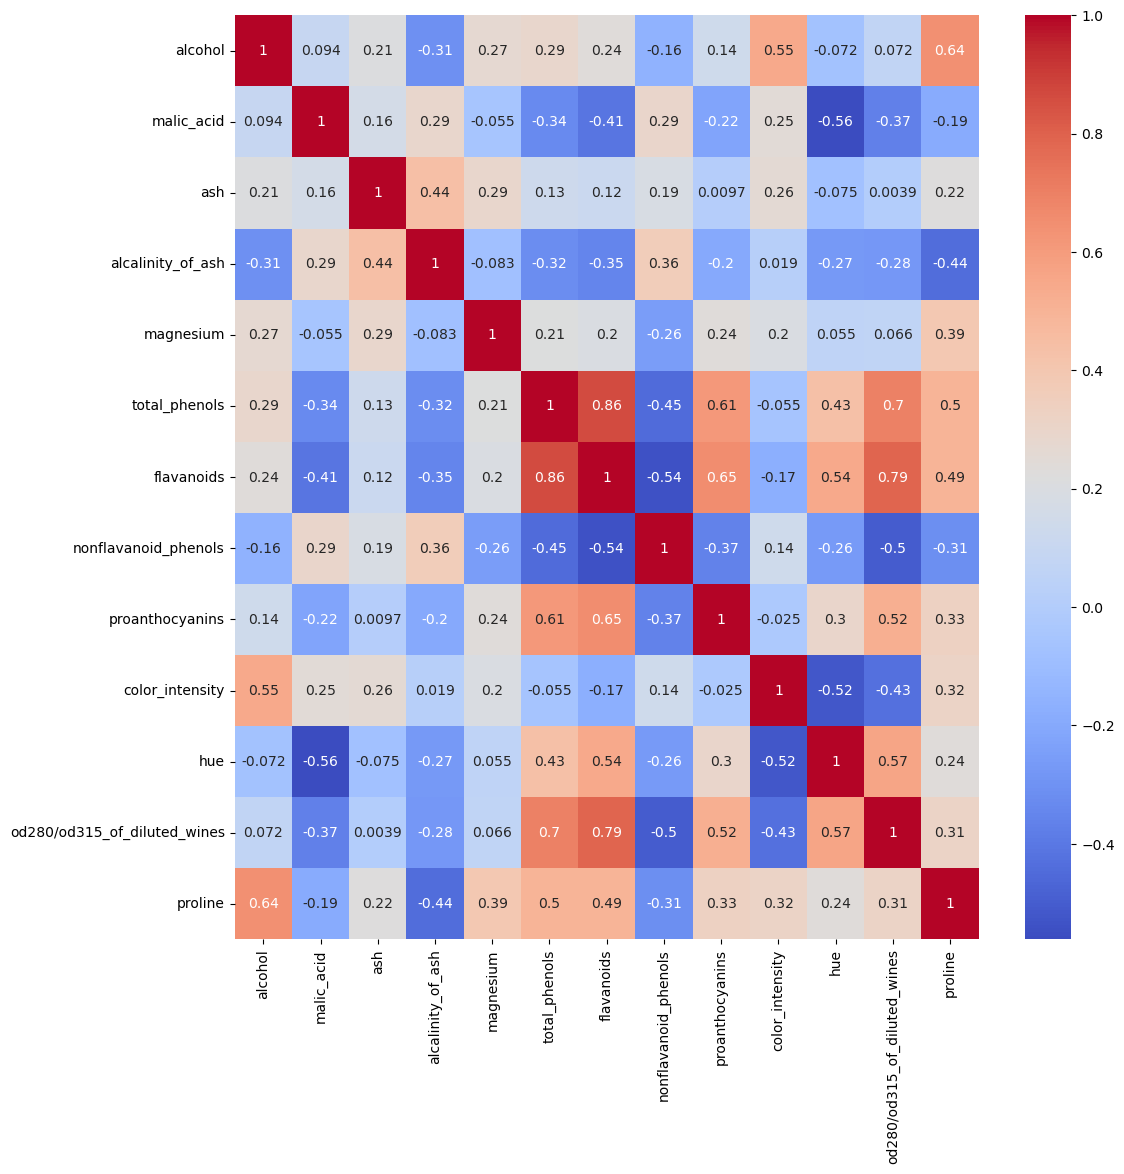

In [34]:
### Checking Corelation with heatmap 

plt.figure(figsize = (12,12))
sns.heatmap(X1.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [35]:
### Dropping Highly Correlated Columns 

X1.drop(["od280/od315_of_diluted_wines","flavanoids","proanthocyanins","proline" ],axis=1,inplace = True)

In [36]:
X1.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,color_intensity,hue
0,14.23,1.71,2.43,15.6,127.0,2.80,0.28,5.64,1.04
1,13.20,1.78,2.14,11.2,100.0,2.65,0.26,4.38,1.05


In [37]:
X1 = np.asarray(X1)
Y1 = np.asarray(Y1)

In [38]:
### Dividing data into traning & testing 

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.30, random_state=25)
print('Shape of the training input data:', X1_train.shape)
print('Shape of the training output data:', Y1_train.shape)
print('Shape of the test input data:', X1_test.shape)
print('Shape of the test output data:', Y1_test.shape)

Shape of the training input data: (124, 9)
Shape of the training output data: (124,)
Shape of the test input data: (54, 9)
Shape of the test output data: (54,)


In [39]:
### Importing required libraries  

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV ,StratifiedKFold
svm_model = SVC()
svm_model

SVC()

In [40]:
### Crearing SVC parameter 

svc_param = {"kernel":["linear","poly","sigmoid"],"gamma":["auto"],"C":[1,10,50,100],"degree":[2,4,6,8],"max_iter":[-1]}

In [41]:
### Fitting hyperparameter to Grid Search CV 

grid = GridSearchCV(svm_model,svc_param)

In [42]:
search = grid.fit(X1_train,Y1_train)

In [43]:
### Checkinng best parameters 
search.best_params_

{'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': -1}

In [44]:
### Checcking best score 
search.best_score_

0.943

### Best Sccore using SVC model is 94% { where , C=1, degree=2, gamma = auto, kernal =poly, max_iter=-1}

## Using sklearn.datasets.load_diabetes apply Mutual info Classification and check which are the best columns according to the target column. 

In [45]:
### Converting Data into pandas DataFrame using pandas library 

X_diab = pd.DataFrame(data = diabetes.data , columns=diabetes.feature_names)
Y_diab = pd.Series(data = diabetes.target, name = "Diabetes")

In [46]:
X_diab.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204


In [47]:
X_diab.info

<bound method DataFrame.info of           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.

In [48]:
### Importing Mutual info classification

from sklearn.feature_selection import mutual_info_classif

In [49]:
### Applying MIC and converting it into series and then attaching with coumns name to check the MIC values 

MIC = mutual_info_classif(X_diab,Y_diab)
MIC_ser = pd.Series(MIC)
col_names = X_diab.columns
MIC_ser.index = col_names

In [50]:
MIC_ser.sort_values(ascending=False)

sex    0.893268
s5     0.189044
s4     0.178756
s3     0.169838
bmi    0.150106
age    0.058538
bp     0.055912
s6     0.004942
s1     0.000000
s2     0.000000
dtype: float64

In [51]:
### Extracting all the mutually columns 

final_column =[]

for i in col_names:
    if MIC_ser[i]>0.15:
        final_column.append(i)
        
print(final_column)

['sex', 'bmi', 's3', 's4', 's5']


In [52]:
final_X = X_diab[final_column]

In [53]:
### Checking new values dataframe after dropping all the less mutually info columns

final_X.head()

,sex,bmi,s3,s4,s5
0,0.050680,0.061696,-0.043401,-0.002592,0.019908
1,-0.044642,-0.051474,0.074412,-0.039493,-0.068330
2,0.050680,0.044451,-0.032356,-0.002592,0.002864
3,-0.044642,-0.011595,-0.036038,0.034309,0.022692
4,-0.044642,-0.036385,0.008142,-0.002592,-0.031991


## Then Apply decision tree on that data and try to get best accuracy by changing the hyperparameters 

In [54]:
### Checking data 

print(final_X.shape)
print(Y_diab.shape)
final_X = np.asarray(final_X)

(442, 5)
(442,)


In [55]:
### Dividing data into traning & testing 

final_X_train, final_X_test, Y_diab_train, Y_diab_test = train_test_split(final_X, Y_diab, test_size=0.33, random_state=99)
print('Shape of the training input data:', final_X_train.shape)
print('Shape of the training output data:', Y_diab_train.shape)
print('Shape of the test input data:', final_X_test.shape)
print('Shape of the test output data:', Y_diab_test.shape)

Shape of the training input data: (296, 5)
Shape of the training output data: (296,)
Shape of the test input data: (146, 5)
Shape of the test output data: (146,)


In [56]:
### Importing Decision tree

from sklearn.tree import DecisionTreeClassifier
DTC_model = DecisionTreeClassifier()
DTC_model

DecisionTreeClassifier()

In [57]:
### Creating hyperparameter for decision tree 

DT_param = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"], "max_depth": [3, 5, 8], 
            "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 5, 7], "max_leaf_nodes": [2, 5, 10]}

In [58]:
### Fitting hyperparameter to Grid Search CV 
skf = StratifiedKFold(n_splits=3)
DTC_grid = GridSearchCV(DTC_model,DT_param,cv=skf)

In [59]:
grid_search = DTC_grid.fit(final_X_train,Y_diab_train)

In [60]:
### Checkinng best parameters 

grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'splitter': 'random'}

In [61]:
### Checcking best score 

grid_search.best_score_

0.02363773792345221

### Used DT Classifier and getting accuracy as too low its may be because apart from DT classifier other model should perform well or the dataset is too low for a better prediction 



## Using sklearn.datasets.load_boston apply Mutual info Regression and check which are the best columns according to the target column. 


In [62]:
### Importing Boston Dataset 

from sklearn.datasets import load_boston

In [63]:
boston = load_boston()
print(boston.data)
print(boston.target)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [64]:
### Converting Data into pandas DataFrame using pandas library 

a = pd.DataFrame(data = boston.data , columns=boston.feature_names)
b = pd.Series(data = boston.target, name = "Target")

In [65]:
a.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [66]:
a.shape

(506, 13)

In [67]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [68]:
### Applying Mutual Info Classification to boston dataset 

from sklearn.feature_selection import mutual_info_regression
MIC_boston = mutual_info_regression(a,b)
MIC_boston_ser = pd.Series(MIC_boston)
boston_col_name = a.columns
MIC_boston_ser.index = boston_col_name

In [69]:
selected_cols =[] 

for i in boston_col_name:
    if MIC_boston_ser[i] >0.25:
        selected_cols.append(i)
        
print(selected_cols)

['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']


In [70]:
a = a[selected_cols]

In [71]:
a.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,5.33


In [72]:
a.shape

(506, 9)


## Then Apply MultiLinear Regression on that data and try to get best accuracy by changing the hyperparameters

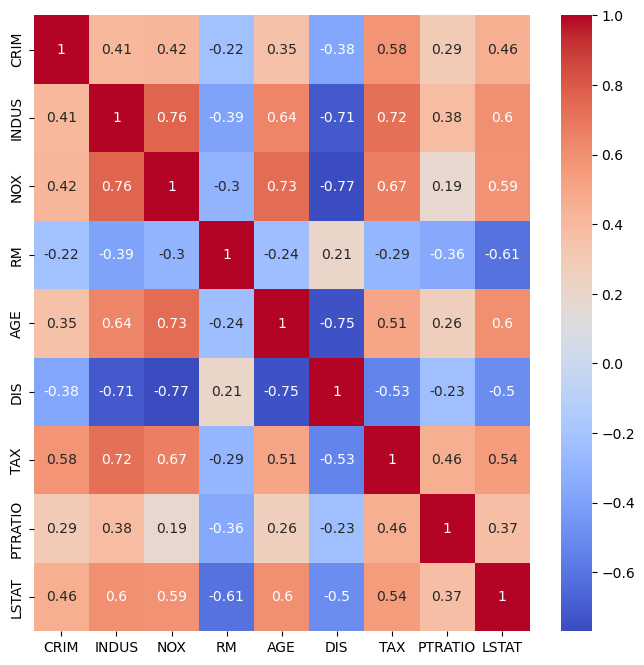

In [73]:
### Checking the correlation between variables 

plt.figure(figsize = (8,8))
sns.heatmap(a.corr(), annot = True , cmap = "coolwarm")
plt.show()

In [74]:
### Selecting columns as per correlation between columns 

a.drop(["NOX","TAX","AGE"],axis=1,inplace = True)

In [75]:
a.head()

,CRIM,INDUS,RM,DIS,PTRATIO,LSTAT
0,0.00632,2.31,6.575,4.0900,15.3,4.98
1,0.02731,7.07,6.421,4.9671,17.8,9.14
2,0.02729,7.07,7.185,4.9671,17.8,4.03
3,0.03237,2.18,6.998,6.0622,18.7,2.94
4,0.06905,2.18,7.147,6.0622,18.7,5.33


In [76]:
### Scaling the data using Standard scaler 

from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()
a = scaler.fit_transform(a)

In [78]:
### Dividing data into traning & testing 

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.20, random_state=42)
print('Shape of the training input data:', a_train.shape)
print('Shape of the training output data:', b_train.shape)
print('Shape of the test input data:', a_test.shape)
print('Shape of the test output data:', b_test.shape)

Shape of the training input data: (404, 6)
Shape of the training output data: (404,)
Shape of the test input data: (102, 6)
Shape of the test output data: (102,)


In [79]:
### Import linear regression from sklearn and fitting our required data 

from sklearn.linear_model import LinearRegression
LR_boston = LinearRegression()
LR_boston

LinearRegression()

In [80]:
### Fitting model and creating prediction and storing predictive values 

LR_boston.fit(a_train,b_train)
prediction = LR_boston.predict(a_test)

In [81]:
### Comparing Actual and predictive values 

pd.DataFrame(data={"Actual":b_test, "Prediction": prediction})

,Actual,Prediction
173,23.6,28.980656
274,32.4,31.473105
491,13.6,16.497856
72,22.8,24.181467
452,16.1,18.565292
...,...,...
412,17.9,-0.109085
436,9.6,18.155759
411,17.2,17.622680
86,22.5,21.689239


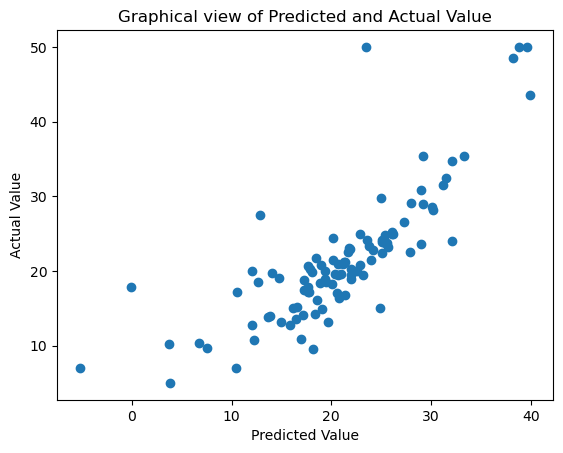

In [82]:
### Relationship between predicted and Actucal values 

plt.scatter(prediction,b_test)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Graphical view of Predicted and Actual Value")
plt.show()

In [83]:
# Mean Squared Error (MSE)
MSE_a=mean_squared_error(b_test, prediction)
print('Mean Squared Error is:', MSE_a)

# Root Mean Squared Error (RMSE)
RMSE_a = math.sqrt(MSE_a)
print('Root Mean Squared Error is:', RMSE_a)

# R2 Score 
r2_a= r2_score(prediction , b_test)
print(f"Model Accuracy is :-  {r2_a*100}%")

Mean Squared Error is: 27.00470741000144
Root Mean Squared Error is: 5.196605373703245
Model Accuracy is :-  53.940709736552115%



### As Linear Regression Model dont have any specific Hyperparameter, So in order to get the optimum accuracy utilizing Regularization Method 


In [84]:
### Importing Regularization from sklearn 

from sklearn.linear_model import Lasso, Ridge

In [85]:
### Defining Lasso and Ridge 

lasso = Lasso()
ridge = Ridge()

In [86]:
### Genrating Hyperparameter for l1 & l2 regularization 

param_grid = {"alpha":[0.1,1,5,10,15]}

In [87]:
### Applying Grid Search CV
 
lasso_grid  = GridSearchCV(lasso,param_grid = param_grid,cv=5, scoring='r2')
ridge_grid  = GridSearchCV(ridge,param_grid = param_grid,cv=4, scoring='r2')

In [88]:
lasso_search = lasso_grid.fit(a_train,b_train)
ridge_search = ridge_grid.fit(a_train,b_train)

In [89]:

print("Best Lasso parameter: ", lasso_search.best_params_)
print("Best Lasso score: ", lasso_search.best_score_)

print("Best Ridge parameter: ", ridge_search.best_params_)
print("Best Ridge score: ", ridge_search.best_score_)

Best Lasso parameter:  {'alpha': 0.1}
Best Lasso score:  0.6910861699238504
Best Ridge parameter:  {'alpha': 15}
Best Ridge score:  0.6948067771188193


### As per L1 & L2 Regularization both lasso & Ridge perform well here so we can use any one of them here .......